# Cleaning US Census Data and make scatter and histogram

# Import Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import re
#The glob module, which is short for global, is a function that's used to search for files that match a specific file pattern or name. It can be used to search CSV files and for text in files.
#In our dataset we have 10 diffiernt files of same csv format files that is why we call globe (glob) library. 

# Read CSV files and inspect the dataframe and use glob library to load the dataset into Dataframes

In [159]:
data_csv = glob.glob('C:/Users/Suhaib Malik/Desktop/DSAI_Course/high_impact_skill_gb-main/Data Cleaning With Pandas/Assignment1/*.csv')
dataframes = []

for file in data_csv:
    df = pd.read_csv(file)
    dataframes.append(df)

us_census = pd.concat(dataframes)

In [160]:
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [161]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [162]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [163]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [164]:
us_census.shape

(60, 11)

# Data Cleaning: For better analysis and visulaization we use regex function to clean the icome column, the income column have intergers and numeric, first we delete the $ sign and comma (,) from the colmun

In [165]:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

#A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
#RegEx can be used to check if a string contains the specified search pattern.
#import re (to call the regular expression module)

In [166]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


# In the second step of cleaning in GenderPop column, male and female attributes are in the same cell, it is therefore  necessary to split the Male and Female. because we have to analyse only female datatype

In [167]:
us_census[['Male', 'Female']] = us_census['GenderPop'].str.split('_', expand=True)

In [168]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135M,19334329F


In [169]:
us_census['Male'] = us_census['Male'].str[:-1]
us_census['Female'] = us_census['Female'].str[:-1]

#remove the string "M" and "F" from the male and females columns

In [170]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329


In [171]:
us_census['Male'] = pd.to_numeric(us_census['Male'])
us_census['Female'] = pd.to_numeric(us_census['Female'])

# convert into numeric using pandas library

In [172]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


In [177]:
#fill null values if any

us_census['Female'] = us_census['Female'].fillna(us_census['TotalPop'] - us_census['Male'])

In [175]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Male', 'Female'],
      dtype='object')

In [176]:
us_census.dtypes

#to confirm the income and female datatype in integer form or not

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male            int64
Female        float64
dtype: object

In [138]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,234109,248952.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,38416,34921.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,329908,334284.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,145191,150629.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,1908713,1933432.0


In [145]:
us_census.shape

(60, 13)

In [150]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,234109,248952.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,38416,34921.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,329908,334284.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,145191,150629.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,1908713,1933432.0


In [151]:
us_census.shape

(60, 13)

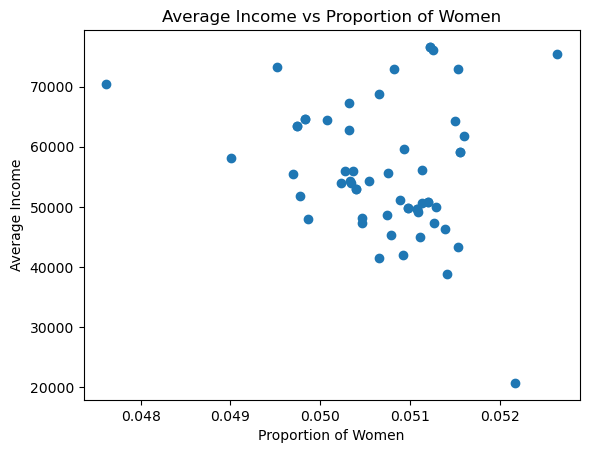

In [152]:
plt.scatter(us_census['Female'] / us_census['TotalPop'], us_census['Income'])
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income')
plt.title('Average Income vs Proportion of Women')
plt.show()


ValueError: Boolean array expected for the condition, not int64